In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#sklearn algorithms
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth', -1)

In [3]:
trainTest = pd.read_csv('trainTest.csv',low_memory = False)
test = pd.read_csv("test.csv")

In [4]:
testids = test['id']

In [5]:
train = trainTest[trainTest['dataType'] == 'train'].copy()
test = trainTest[trainTest['dataType'] == 'test'].copy()

In [6]:
train.status_group.head()

0    functional    
1    functional    
2    functional    
3    non functional
4    functional    
Name: status_group, dtype: object

In [7]:
#load label encoder
le = preprocessing.LabelEncoder()

In [8]:
#apply label encoder to train data
train = train.apply(le.fit_transform)

#apply label encoder to test data
#test = test.apply(le.fit_transform)

In [9]:
train.status_group.head()

0    0
1    0
2    0
3    2
4    0
Name: status_group, dtype: int64

In [10]:
status_group_labels = {0:'functional',
                       1:'functional needs repair',
                       2:'nonfunctional'}

In [11]:
#create target variable for validation
target = train.status_group

#remove target variable from train
train = train.drop(['status_group','dataType'],axis =1)

In [12]:
#consider setting random state to see if things get better?

In [13]:
#create training & test data for validation
xTrain, xTest, yTrain, yTest = train_test_split(train,target, test_size = .3)

#splits data set into 2 groups of 2 groups

#Group 1: train & test
#Group 2: x & y

#Group 1:
#train has 70% of the data according to test_size and test has the remaining 30%
#train is what you use to fit the model
#test is what you validate it on

#Group 2:
#x entire data frame to train the model 
#y the target variables for the model 

# xTrain inputs for determining yTrain to fit the model
# yTest inputs for trying to predict yTest to validate the model

In [14]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(41580, 36) (41580,)
(17820, 36) (17820,)


In [15]:
#import ML algorithms
clf_tree = tree.DecisionTreeClassifier()
clf_rnf = RandomForestClassifier()
clf_gbc = GradientBoostingClassifier()

In [15]:
#fit model
model_tree = clf_tree.fit(xTrain,yTrain)
model_rnf = clf_rnf.fit(xTrain,yTrain)
model_gbc = clf_gbc.fit(xTrain,yTrain)

In [16]:
#make predictions
predictions_tree = model_tree.predict(xTest)
predictions_rnf = model_rnf.predict(xTest)
predictions_gbc = model_gbc.predict(xTest)

In [17]:
#contains a list of predictions for the model
print(predictions_tree[0:30])
print(predictions_rnf[0:30])
print(predictions_gbc[0:30])

[0 0 0 2 0 0 0 2 0 0 0 2 2 2 2 2 0 0 1 0 2 0 2 2 0 2 0 0 0 0]
[0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 2 0 0 1 0 2 0 2 2 0 2 0 0 0 0]
[0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 0 2 0 0 0 0]


In [18]:
model_dif = (predictions_tree == predictions_rnf)

In [19]:
model_dif.tolist().count(False)
#number of instances where rnf disagrees with decision tree

2733

In [20]:
model_dif.tolist().count(False)/len(model_dif)
#a little more than 14% of the data

0.15336700336700337

In [21]:
#accuracy score import
from sklearn.metrics import accuracy_score

#print(tree_model.score(xTest,yTest))
#for the tree model, here is how well you predict yTest, given inputs of xTest

#print(accuracy_score(yTest,predictions))
#here is how the actual values of yTest compare with your predictions

In [22]:
print(accuracy_score(yTest,predictions_tree))
print(accuracy_score(yTest,predictions_rnf))
print(accuracy_score(yTest,predictions_gbc))
#find that Random Forest is more accurate
#also seems that rnf changes a little bit

0.756060606061
0.790965207632
0.745510662177


In [23]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

In [24]:
#confusion matrix
#diagonals are correct predictions
#off diagonals are false positives/false negatives

cm = confusion_matrix(yTest,predictions_rnf)
print(cm)

[[8425  323  902]
 [ 671  449  169]
 [1497  163 5221]]


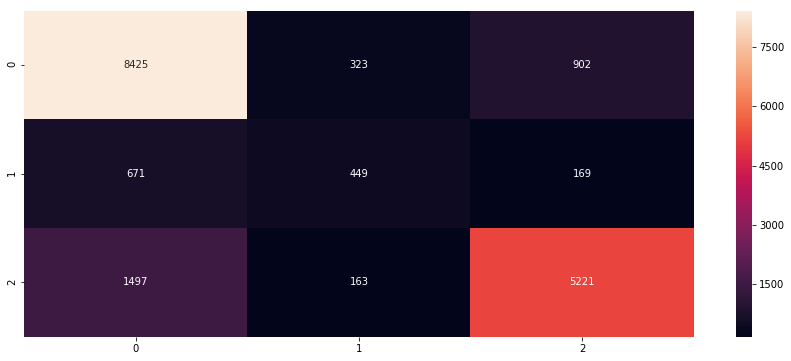

In [25]:
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(cm, annot=True, fmt='g')
#lighter the color, the more right it is
#biggest problem: incorrect classification of functional(0) as nonfunctional(2)
#2nd biggest: incorrect nonfunctional(2) as functional(0)
#3rd problems classification of functional needs repair 

In [26]:
status_group_labels

{0: 'functional', 1: 'functional needs repair', 2: 'nonfunctional'}

In [27]:
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
#https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-4

In [28]:
#look at this to try and explore kfolds tutorial
#http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [29]:
#need to split it out ahead of time
folds = 10

X_folds = np.array_split(train, folds) #inputs
y_folds = np.array_split(target, folds) #outputs
scores = list()

for k in range(folds):
     # We use 'list' to copy, in order to 'pop' later on
        #pop returns the element present at the given index
        #but removes the element at the given index and updates the list
        
        #in other words, pop simuletanously
        #creates the test data by returning the index
        #updates the train data by removing the test from it
     X_train = list(X_folds)
     X_test  = X_train.pop(k) 
     X_train = np.concatenate(X_train) #joins the 2 train arrays into a single array
     y_train = list(y_folds)
     y_test  = y_train.pop(k)
     y_train = np.concatenate(y_train)
     scores.append(clf_rnf.fit(X_train, y_train).score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.79898989898989903, 0.80555555555555558, 0.788047138047138, 0.79343434343434338, 0.8101010101010101, 0.79158249158249161, 0.80101010101010106, 0.79090909090909089, 0.80235690235690238, 0.80134680134680136]
0.798333333333


In [31]:
from sklearn.model_selection import KFold, cross_val_score

In [32]:
#this does the same thing as above, but in less code (I think)

#http://scikit-learn.org/stable/modules/cross_validation.html
clf_rnf = RandomForestClassifier()
scores = cross_val_score(clf_rnf, train, target, cv =10)
print(scores) #gives each of the scores
print(scores.mean()) #averages everything out

#does am I fitting the model during this step?  Or just seeing if it is working?

[ 0.80642989  0.804915    0.79128093  0.79330079  0.80218855  0.7956229
  0.80387205  0.79272605  0.78969523  0.80262715]
0.79826585436


In [39]:
#test to see how increase in folds modify values
starting_folds = 3

for x in range(5):
    scores = cross_val_score(clf_rnf, train, target, cv = starting_folds)
    print("Starting Folds: {}".format(starting_folds))
    print("Kfold Average: {}".format(scores.mean()))
    starting_folds = (starting_folds+3)

Starting Folds: 3
Kfold Average: 0.7926430976430977
Starting Folds: 6
Kfold Average: 0.7969862425295334
Starting Folds: 9
Kfold Average: 0.7982150106729878
Starting Folds: 12
Kfold Average: 0.7981647240180498
Starting Folds: 15
Kfold Average: 0.7994107751615858


In [ ]:
#above shows that additional folds show the model is getting better 

In [ ]:
#so how does this work
#my understanding

#fit/trained the rnf 10 different times, but they are independent and didn't affect one another
#now need to average the results - is this a straight average?  Or does something else happen?

In [51]:
#from sklearn.model_selection import cross_val_predict

In [52]:
#predictions2 = cross_val_predict(clf_rnf,train,target,cv=10)

In [41]:
#from sklearn import metrics
#metrics.accuracy_score(target, predictions2)

In [16]:
#trying hyperparatmer grid using RandomziedSearchCV
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#max_depth = [5, 10, 15, 'None']

min_samples_split = [2,3,4]

min_samples_leaf = [1,2,3,4]

In [17]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    #'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [73]:
model_rfc = RandomForestClassifier()

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [74]:
random_cv = RandomizedSearchCV(estimator = model_rfc,
                               param_distributions=hyperparameter_grid,
                               cv=4, 
                               n_iter=10, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [75]:
random_cv.fit(xTrain,yTrain)
#worked for one example 

#need to find what a RandomizedGrid Does

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=1)

In [76]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#should I just make a new model with all this stuff optimized? and include it

In [18]:
clf_rnf_cv = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
clf_rnf_cv.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
random_cv_scores = cross_val_score(clf_rnf_cv, train, target, cv =10)

In [81]:
print(random_cv_scores)
print(random_cv_scores.mean())

[ 0.80656566  0.80853535  0.80616162]
0.807087542088


In [ ]:
#looks like that messing around with some of the funcitons improved the performance by a tiny amount

In [ ]:
#making a new prediction with all the data

In [83]:
test.head()

,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
59400,Internal,2012,test,2013-02-04,3,other,other,other,-4.059696,35.290799,parastatal,parastatal,0,never pay,321,good,seasonal,seasonal,Manyara,21,rainwater harvesting,surface,rainwater harvesting,NaN,soft,other,other,2013,2,4,0,2,1,0,1,0,0,1
59401,Pangani,2000,test,2013-02-04,2,gravity,gravity,gravity,-3.309214,36.656709,vwc,user-group,0,never pay,300,good,insufficient,insufficient,Arusha,2,spring,groundwater,spring,NaN,soft,communal standpipe,communal standpipe,2013,2,4,0,2,0,0,1,0,0,0
59402,Internal,2010,test,2013-02-01,2,other,other,other,-5.004344,34.767863,vwc,user-group,0,never pay,500,good,insufficient,insufficient,Singida,13,rainwater harvesting,surface,rainwater harvesting,NaN,soft,other,other,2013,2,1,0,2,1,0,1,0,0,1
59403,Ruvuma / Southern Coast,1987,test,2013-01-22,43,other,other,other,-9.418672,38.058046,vwc,user-group,0,unknown,250,good,dry,dry,Lindi,80,shallow well,groundwater,shallow well,NaN,soft,other,other,2013,1,22,0,1,1,0,1,1,0,1
59404,Ruvuma / Southern Coast,2000,test,2013-03-27,3,gravity,gravity,gravity,-10.950412,35.006123,water board,user-group,0,monthly,60,good,enough,enough,Ruvuma,10,spring,groundwater,spring,NaN,soft,communal standpipe,communal standpipe,2013,3,27,0,3,0,0,0,0,0,0


In [25]:
test = test.drop(['status_group','dataType'],axis =1)

In [26]:
test.head()

,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
59400,0,53,255,3,9,3,6,9393,7522,3,2,0,2,260,2,3,3,8,20,5,1,3,6,6,5,4,1,3,0,1,1,0,1,0,0,1
59401,5,41,255,2,3,0,1,11210,9367,7,4,0,2,248,2,2,2,0,1,8,0,6,6,1,1,4,1,3,0,1,0,0,1,0,0,0
59402,0,51,252,2,9,3,6,7494,6673,7,4,0,2,360,2,2,2,18,12,5,1,3,6,6,5,4,1,0,0,1,1,0,1,0,0,1
59403,7,28,242,13,9,3,6,1843,12106,7,4,0,6,209,2,0,0,7,23,7,0,5,6,6,5,4,0,21,0,0,1,0,1,1,0,1
59404,7,41,306,3,3,0,1,295,7187,9,4,0,1,52,2,1,1,16,9,8,0,6,6,1,1,4,2,26,0,2,0,0,0,0,0,0


In [19]:
#apply label encoder to train data
test = test.apply(le.fit_transform)
test.head()

,basin,construction_year,dataType,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,status_group,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
59400,0,53,0,255,3,9,3,6,9393,7522,3,2,0,2,260,2,3,3,8,20,5,1,3,0,6,6,5,4,1,3,0,1,1,0,1,0,0,1
59401,5,41,0,255,2,3,0,1,11210,9367,7,4,0,2,248,2,2,2,0,1,8,0,6,9891,6,1,1,4,1,3,0,1,0,0,1,0,0,0
59402,0,51,0,252,2,9,3,6,7494,6673,7,4,0,2,360,2,2,2,18,12,5,1,3,9892,6,6,5,4,1,0,0,1,1,0,1,0,0,1
59403,7,28,0,242,13,9,3,6,1843,12106,7,4,0,6,209,2,0,0,7,23,7,0,5,9893,6,6,5,4,0,21,0,0,1,0,1,1,0,1
59404,7,41,0,306,3,3,0,1,295,7187,9,4,0,1,52,2,1,1,16,9,8,0,6,9894,6,1,1,4,2,26,0,2,0,0,0,0,0,0


In [20]:
#train on all the data I have

In [21]:
train.head()

,basin,construction_year,date_recorded,district_code,extraction_type,extraction_type_class,extraction_type_group,latitude,longitude,management,management_group,num_private,payment_type,population,quality_group,quantity,quantity_group,region,region_code,source,source_class,source_type,water_quality,waterpoint_type,waterpoint_type_group,year,month,day,pre2011,quarterMonth,otherExtractionType,unknownManagmentGroup,unknownNeverPaymentType,dryQuantityGroup,unknownQuantityGroup,otherWaterType
0,1,40,47,5,3,0,1,5513,28152,7,4,0,0,109,2,1,1,3,10,8,0,6,6,1,1,2,2,13,0,2,0,0,0,0,0,0
1,4,51,309,2,3,0,1,53253,25573,11,4,0,2,276,2,2,2,9,19,5,1,3,6,1,1,4,2,5,0,2,0,0,1,0,0,0
2,5,50,300,4,3,0,1,38862,44704,7,4,0,5,247,2,1,1,8,20,0,1,1,6,2,1,4,1,24,0,1,0,0,0,0,0,0
3,7,27,272,17,14,5,10,474,50370,7,4,0,2,58,2,0,0,12,25,3,0,0,6,2,1,4,0,27,0,0,0,0,1,1,0,0
4,4,0,104,1,3,0,1,54521,4772,1,1,0,2,0,2,3,3,4,17,5,1,3,6,1,1,2,6,12,0,0,0,0,1,0,0,0


In [22]:
xTrainFinal = train
yTrainFinal = target

In [27]:
clf_rnf_cv.fit(xTrainFinal,yTrainFinal)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
#make final predictions
predictions_clf_rnf_cv = clf_rnf_cv.predict(test)

In [29]:
predictions_clf_rnf_cv[0:10]

array([2, 0, 0, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [30]:
#{0: 'functional', 1: 'functional needs repair', 2: 'nonfunctional'}

def decode(x):
    if x == 0:
        return('functional')
    if x == 1:
        return('functional needs repair')
    if x == 2:
        return('nonfunctional')
    else:
        return('error')

In [31]:
rnf_predictions = pd.DataFrame(predictions_clf_rnf_cv)

In [32]:
type(rnf_predictions)

pandas.core.frame.DataFrame

In [33]:
rnf_predictions.head()

,0
0,2
1,0
2,0
3,2
4,0


In [35]:
rnf_predictions.columns = ['status_group']

In [36]:
rnf_predictions.head()

,status_group
0,2
1,0
2,0
3,2
4,0


In [37]:
rnf_predictions['status_group'] = rnf_predictions['status_group'].apply(decode)

In [38]:
rnf_predictions.head()

,status_group
0,nonfunctional
1,functional
2,functional
3,nonfunctional
4,functional


In [39]:
rnfPred = pd.concat([testids, rnf_predictions], axis = 1)

In [40]:
rnfPred.head()

,id,status_group
0,50785,nonfunctional
1,51630,functional
2,17168,functional
3,45559,nonfunctional
4,49871,functional


In [41]:
#results wasn't very good.  Maybe just try standard random forest and XG boost to get some baselines
rnfPred.to_csv('rnfPred.csv',index=False)